In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Примеры случайных величин

### Пример 1: бросок игральных костей

Имеем выпадение случайного числа от 1 до 6

Что вы видите на следующем рисунке?

Это наглядное представление того, что каждая функция из выборки, например, выборочное среднее, также имеет случайную природу! И каждый раз, когда вы генерируете новую выборку, значение выбранной функции будет разным.

Попробуйте изменить переменную `sample_size` и посмотрите, что произойдет.

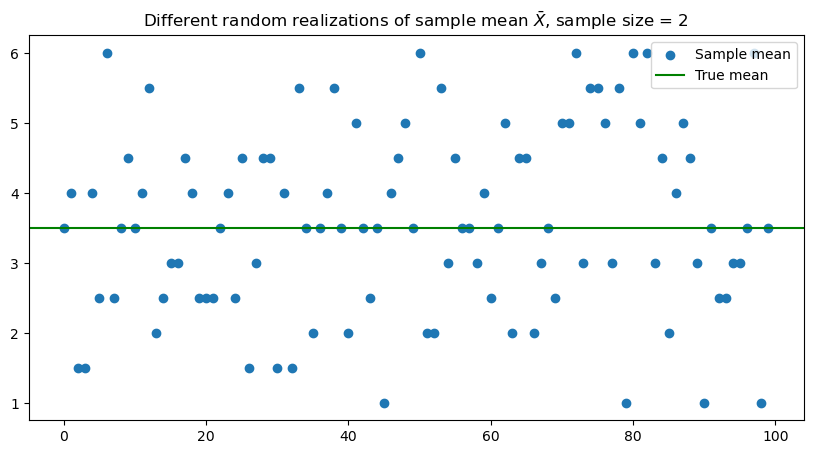

In [3]:
# Генерируем выборку
n_draws = 100
sample_size = 2
r = stats.randint(1,7)
mu = r.mean()
var = r.var()
result = np.empty(n_draws)


for i in range(n_draws):
    sample_realization = r.rvs(size=sample_size)
    result[i] = np.mean(sample_realization)


# Рисуем график
figure = plt.figure(figsize=(10, 5))
ax = figure.add_subplot()
ax.scatter(np.arange(n_draws), result, label='Sample mean')
ax.axhline(r.mean(), color='green', label = 'True mean')
plt.legend()
plt.title(r'Different random realizations of sample mean $\bar{X}$, sample size = %d' % sample_size)
plt.show()

Сравним картинку для разных сначений `sample_size`

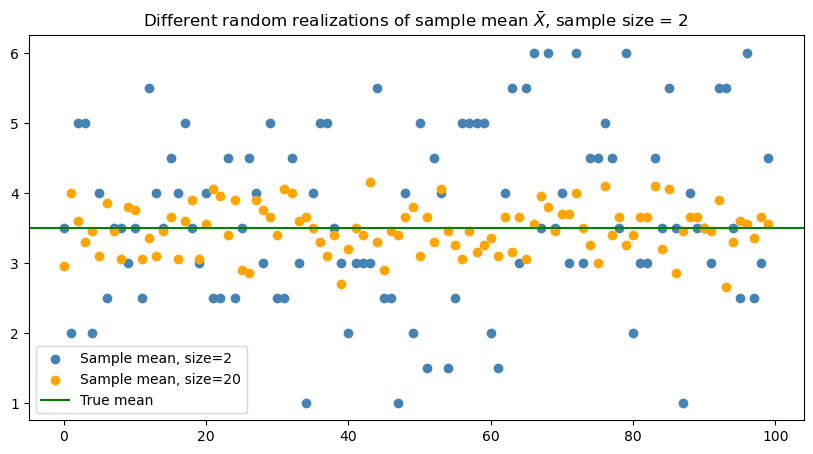

In [4]:
# Генерируем выборку
from turtle import color


n_draws = 100
sample_size_1 = 2
sample_size_2 = 20
r = stats.randint(1,7)
mu = r.mean()
var = r.var()
result_1 = np.empty(n_draws)
result_2 = np.empty(n_draws)


for i in range(n_draws):
    sample_realization_1 = r.rvs(size=sample_size_1)
    sample_realization_2 = r.rvs(size=sample_size_2)
    result_1[i] = np.mean(sample_realization_1)
    result_2[i] = np.mean(sample_realization_2)


# Рисуем график
figure = plt.figure(figsize=(10, 5))
ax = figure.add_subplot()
ax.scatter(np.arange(n_draws), result_1, label=f'Sample mean, size={sample_size_1}', color='steelblue')
ax.scatter(np.arange(n_draws), result_2, label=f'Sample mean, size={sample_size_2}', color='orange')
ax.axhline(r.mean(), color='green', label = 'True mean')
plt.legend()
plt.title(r'Different random realizations of sample mean $\bar{X}$, sample size = %d' % sample_size)
plt.show()

Попробуем посмотреть на аппроксимацию функцию плотности вероятности, построив гистограмму.

Также попробуйте изменить `размер_выборки` ниже и посмотрите, что произойдет с гистограммой.

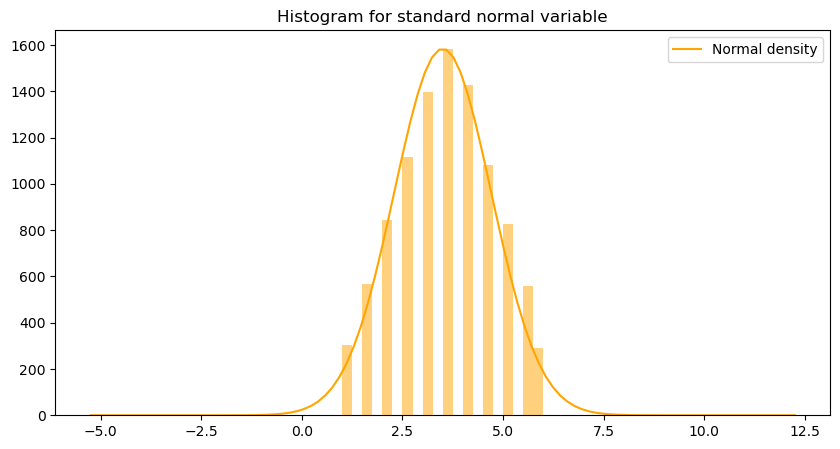

In [5]:
n_draws = 10000
sample_size = 2
n_bins = 20
result = np.empty(n_draws)

for i in range(n_draws):
    sample_realization = r.rvs(size=sample_size)
    result[i] = np.mean(sample_realization)

figure = plt.figure(figsize=(10, 5))
ax = figure.add_subplot()
counts, _, _ = plt.hist(result, bins=n_bins, alpha=0.5, color='orange')
plt.title('Histogram for standard normal variable')

# scaling of normal PDF is needed, because histogram has large values on y-axis, and we need to fit them
x_space = np.linspace(mu - 3 * var,  mu + 3 * var, 100)
ax.plot(x_space, 
        np.max(counts) * stats.norm.pdf(x_space, mu, np.sqrt(var / sample_size)) * np.sqrt(2 * np.pi * var / sample_size), 
        label='Normal density', color='orange')
plt.legend()
plt.show()

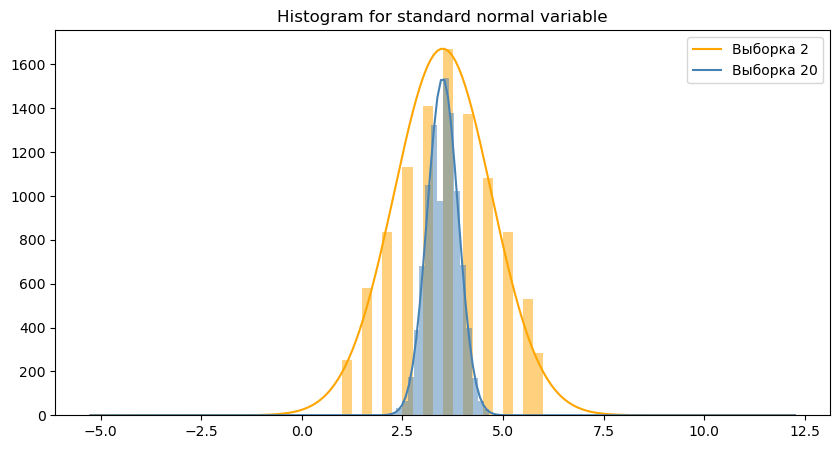

In [6]:
n_draws = 10000
sample_size_1 = 2
sample_size_2 = 20
n_bins = 20
result_1 = np.empty(n_draws)
result_2 = np.empty(n_draws)

for i in range(n_draws):
        sample_realization_1 = r.rvs(size=sample_size_1)
        sample_realization_2 = r.rvs(size=sample_size_2)
        result_1[i] = np.mean(sample_realization_1)
        result_2[i] = np.mean(sample_realization_2)

figure = plt.figure(figsize=(10, 5))
ax = figure.add_subplot()
counts_1, _, _ = plt.hist(result_1, bins=n_bins, alpha=0.5, color='orange')
counts_2, _, _ = plt.hist(result_2, bins=n_bins, alpha=0.5, color='steelblue')
plt.title('Histogram for standard normal variable')

# scaling of normal PDF is needed, because histogram has large values on y-axis, and we need to fit them
x_space = np.linspace(mu - 3 * var,  mu + 3 * var, 200)
ax.plot(x_space, 
        np.max(counts_1) * stats.norm.pdf(x_space, mu, np.sqrt(var / sample_size_1)) * np.sqrt(2 * np.pi * var / sample_size_1), 
        label=f'Выборка {sample_size_1}', color='orange')
ax.plot(x_space, 
        np.max(counts_2) * stats.norm.pdf(x_space, mu, np.sqrt(var / sample_size_2)) * np.sqrt(2 * np.pi * var / sample_size_2), 
        label=f'Выборка {sample_size_2}', color='steelblue')

plt.legend()
plt.show()

### Пример 2: выборка из нормального распределения

Вспомним, что если у нас есть две случайные величины, распределенные нормальным образом (не обязательно нормальным, просто для примера) и 
$$
X_1, X_2 \sim \mathcal{N}(\mu, \sigma^2)
$$
, но среднее от них будет иметь распределение
$$
\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})
$$
Дисперсия среднего уменьшается с ростом числа выборки, т.е чем больше $n$(sample_size) тем ближе среднее приближается к среднему генеральной совокупности

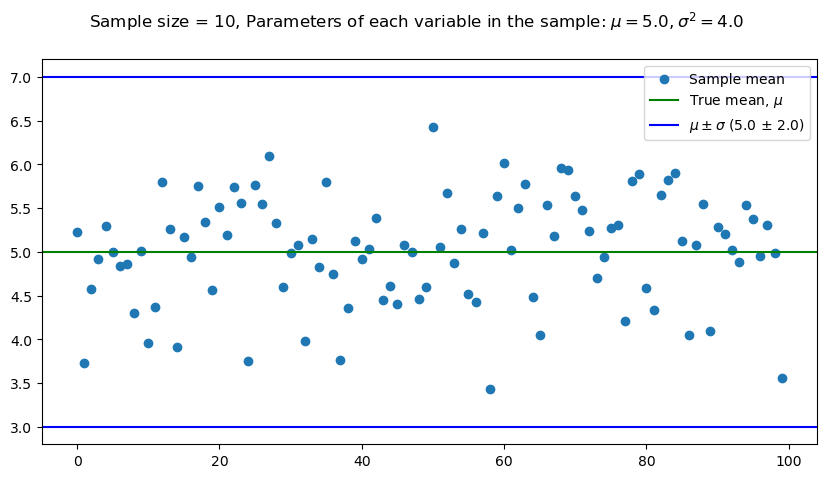

In [7]:
n_draws = 100
sample_size = 10
r = stats.norm(5, 2)
mu = r.mean()
var = r.var()
std = r.std()

result = np.empty(n_draws)


for i in range(n_draws):
    sample_realization = r.rvs(size=sample_size)
    result[i] = np.mean(sample_realization)
figure = plt.figure(figsize=(10, 5))
ax = figure.add_subplot()
ax.scatter(np.arange(n_draws), result, label='Sample mean')
ax.axhline(r.mean(), color='green', label = r'True mean, $\mu$')
ax.axhline(r.mean() + std, color='blue', label = fr'$\mu \pm \sigma$ ({mu} $\pm$ {std})')
ax.axhline(r.mean() - std, color='blue')
plt.legend(loc='best')
figure.suptitle(fr'Sample size = {sample_size}, Parameters of each variable in the sample: $\mu = {mu}, \sigma^2 = {var}$')
plt.show()

Посмотрим как влияет размер выборки (семпла) на распределение средних

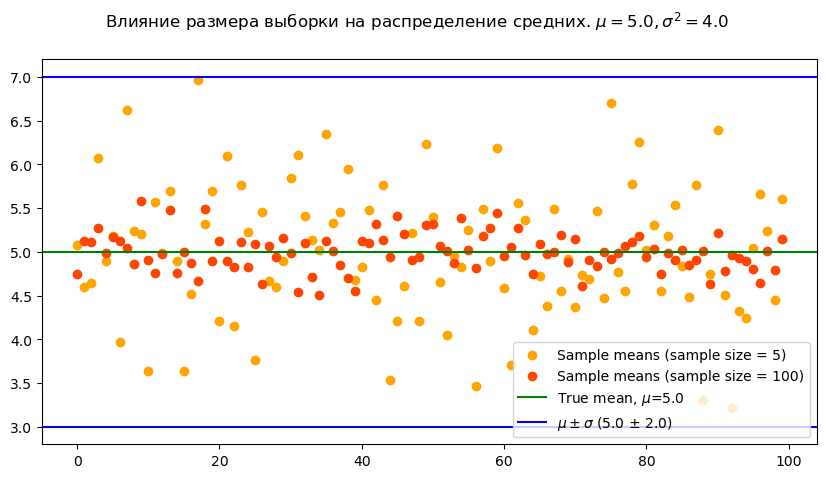

In [8]:
# from turtle import color


n_draws = 100
sample_size_1 = 5
sample_size_2 = 100
r = stats.norm(5, 2)
mu = r.mean()
var = r.var()
std = r.std()

result_1 = np.empty(n_draws)
result_2 = np.empty(n_draws)


for i in range(n_draws):
    sample_realization_1 = r.rvs(size=sample_size_1)
    sample_realization_2 = r.rvs(size=sample_size_2)
    result_1[i] = np.mean(sample_realization_1)
    result_2[i] = np.mean(sample_realization_2)

figure = plt.figure(figsize=(10, 5))
ax = figure.add_subplot()
ax.scatter(np.arange(n_draws), result_1, label=f'Sample means (sample size = {sample_size_1})', color='orange')
ax.scatter(np.arange(n_draws), result_2, label=f'Sample means (sample size = {sample_size_2})', color='orangered')
ax.axhline(r.mean(), color='green', label = fr'True mean, $\mu$={mu}')
ax.axhline(r.mean() + std, color='blue', label = fr'$\mu \pm \sigma$ ({mu} $\pm$ {std})')
ax.axhline(r.mean() - std, color='blue')
plt.legend(loc='best')
figure.suptitle(fr'Влияние размера выборки на распределение средних. $\mu = {mu}, \sigma^2 = {var}$')
plt.show()

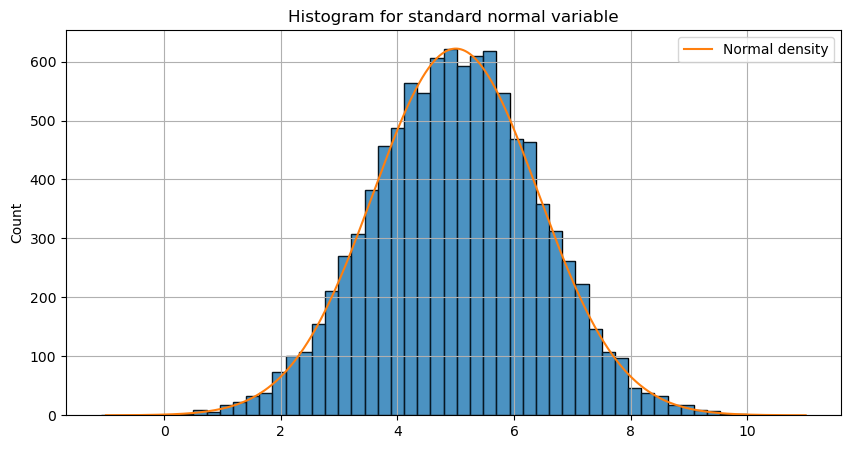

In [10]:
n_draws = 10000
sample_size = 2
n_bins = 50
result = np.empty(n_draws)

for i in range(n_draws):
    sample_realization = r.rvs(size=sample_size)
    result[i] = np.mean(sample_realization)

figure = plt.figure(figsize=(10, 5))
ax = figure.add_subplot()
sns.histplot(result, bins=n_bins).grid()
counts, _, _ = plt.hist(result, bins=n_bins, alpha=0.2)  # just in order to find out the scaling coefficient for PDF
plt.title('Histogram for standard normal variable')

# scaling of normal PDF is needed, because histogram has large values on y-axis, and we need to fit them
x_space = np.linspace(mu - 3* std,  mu + 3*std, 5000)
ax.plot(x_space, np.max(counts) * stats.norm.pdf(x_space, mu, np.sqrt(var / sample_size)) * np.sqrt(2 * np.pi * var / sample_size), label='Normal density')
plt.legend()
plt.show()